Работу выполнила Гатауллина Альбина Ильмировна

In [1]:
from scipy.stats import bootstrap
import pandas as pd
import numpy as np 
import seaborn as sns
from arch.bootstrap import IIDBootstrap, IndependentSamplesBootstrap

В данных собрана информация о двух группах (контрольной и экпериментальной), которые проводит время на сайте с новым дизацном и старым дизайном.

In [58]:
df = pd.read_csv('bootstrap_data.csv')

In [59]:
df.head()

,value,group
0,100.719713,experimental
1,106.771525,experimental
2,106.974612,experimental
3,109.249662,experimental
4,116.230142,experimental


In [61]:
df.groupby('group').agg({'value': 'count'})

,value
group,
control,760
experimental,494


Аггрегируем информацию по группам и смотрим их распределение по времени проведенном на сайте.
По графику ниже видно, что дисперсия у контрольной группы больше, так как больше размах

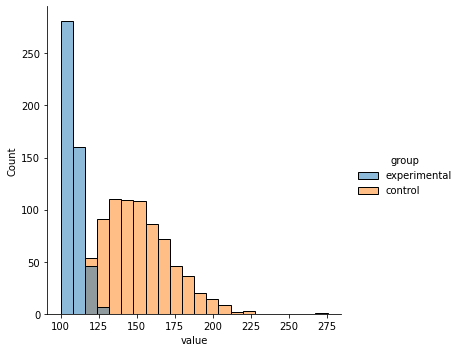

In [62]:
sns.displot(data=df, x="value", hue="group")

In [63]:
df.groupby('group').agg({'value': np.median})

,value
group,
control,148.832127
experimental,106.982597


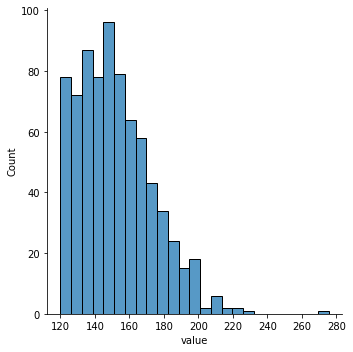

In [65]:
sns.displot(data=df[df.group == 'control'], x="value")

In [66]:
control_df = df[df.group == 'control']

In [67]:
control_df.value.median()

148.83212650911054

In [94]:
medians = []

In [95]:
n = 10000

In [96]:
for i in range(10000):
    sample_data = control_df.sample(frac=1, replace=True)
    sample_median = sample_data.value.median()
    medians.append(sample_median)

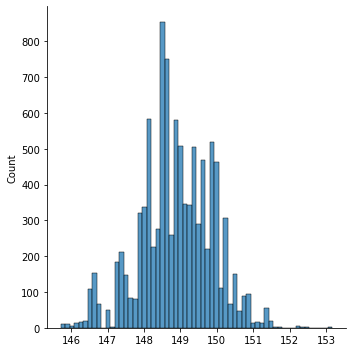

In [100]:
sns.displot(medians)

In [130]:
pd.Series(medians).quantile(0.975)

150.77638710063675

In [131]:
pd.Series(medians).quantile(0.025)

146.64531974830183

In [137]:
bootstrap((control_df.value, ), np.mean)

BootstrapResult(confidence_interval=ConfidenceInterval(low=150.49743040881887, high=153.52959511805312), standard_error=0.780905002197868)

In [134]:
exp_df = df[df.group == 'experimental']
median_diff = []

for i in range(10000):
    sample_data_control = control_df.sample(frac=1, replace=True)
    sample_median_control = sample_data_control.value.median()
    
    
    sample_data_exp = exp_df.sample(frac=1, replace=True)
    sample_median_exp = sample_data_exp.value.median()
    
    sample_median_diff = sample_median_control - sample_median_exp
    median_diff.append(sample_median_diff)
    


In [135]:
pd.Series(median_diff).quantile(0.975)

43.98874583359649

In [136]:
pd.Series(median_diff).quantile(0.025)

39.66304717171123

Построили раздницу между медианами при многократном повторении эксперимента и выявили, 
что раздница между медианами положительная и статистически значимая, что говорит о том, что можно вводить новый дизайн сайта 